# TP 4
## Procesamiento en el dominio espacial

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Punto 1

## Negativo

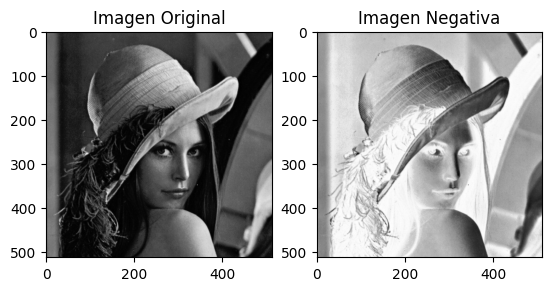

In [2]:
img = cv2.imread('Imagenes/lena_gray.tif', cv2.IMREAD_UNCHANGED)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
negative = 255 - img
fig[1].imshow(negative, cmap='gray')
fig[1].set_title('Imagen Negativa')
plt.show()

In [3]:
print (img.max())

227


## Transformación

La idea es hacer una transformación por tramos, donde todos los valores menores a 0.25 se mapean a 0, y todos los mayores a 0.5 se mapean a 1

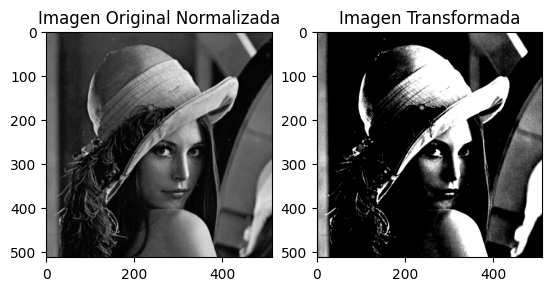

In [4]:
img = img.astype(np.float32) / 255.0 #para normalizar entre 0 y 1
low_in, high_in = 0.25, 0.5
low_out, high_out = 0.0, 1.0

transformed = np.clip((img - low_in) / (high_in - low_in), 0, 1) # Escala entre 0 y 1

ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original Normalizada')
fig[1].imshow(transformed, cmap='gray')
fig[1].set_title('Imagen Transformada')
plt.show()

# Punto 2

Parece haber un problema de contraste, esto se debería observar en el histograma.

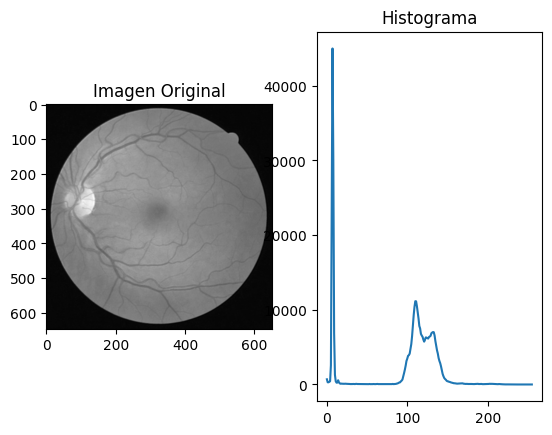

In [5]:
img = cv2.imread('Imagenes/eyebw.jpg', cv2.IMREAD_GRAYSCALE)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
hist, bins = np.histogram(img.flatten(), 256, [0,256])
fig[1].plot(hist)
fig[1].set_title('Histograma')
plt.show()

Hay un pico en 0 por el marco negro de la foto. Si ignoramos esto, observamos que hay muy poca dispersión entre los valores de intensidad (hay poca diferencia entre la mínima y máxima intensidad).

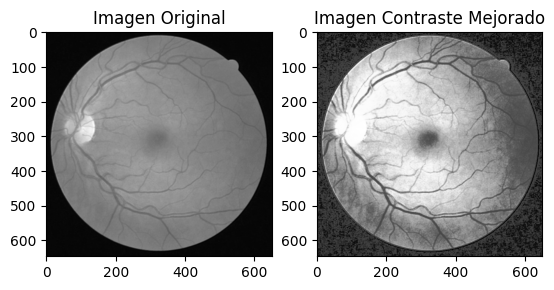

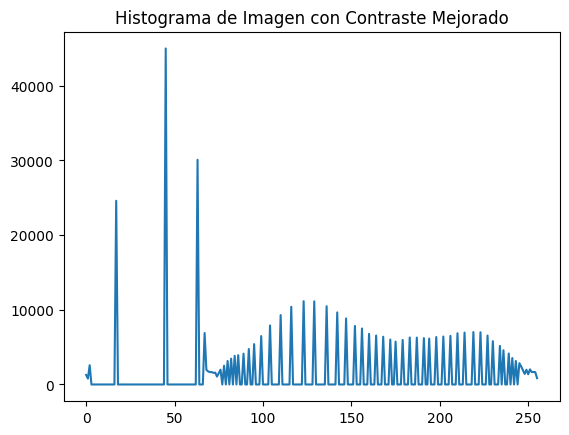

In [6]:
contraste = cv2.equalizeHist(img)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(img, cmap='gray')
fig[0].set_title('Imagen Original')
fig[1].imshow(contraste, cmap='gray')
fig[1].set_title('Imagen Contraste Mejorado')
plt.show()

hist, bins = np.histogram(contraste.flatten(), 256, [0,256])
plt.plot(hist)
plt.title('Histograma de Imagen con Contraste Mejorado')
plt.show()

El marco no es completamente negro, creo que esto está haciendo que se "borronee". Voy a hacer una transformación previa para ver si mejora.

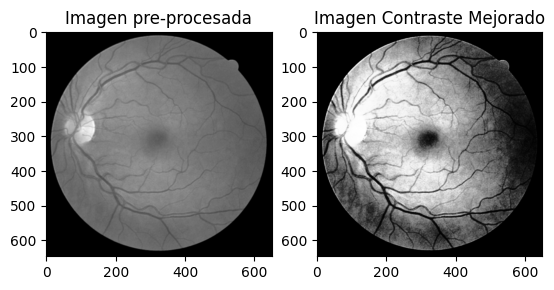

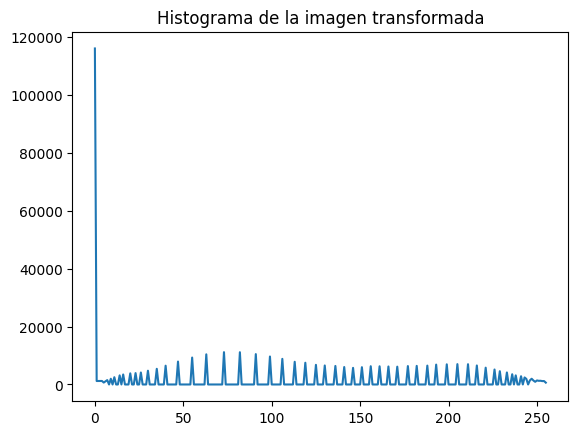

In [7]:

low_in, high_in = 0.1, 0.95
low_out, high_out = 0.0, 1.0
img_copy = img.astype(np.float32) / 255.0 #para normalizar entre 0 y 1
recortada = np.clip((img_copy - low_in) / (high_in - low_in), low_out, high_out) # Escala entre 0 y 1

recortada = (recortada * 255.0).astype(np.uint8) # Volver a 0-255 para equalizeHist

contraste = cv2.equalizeHist(recortada)
ax, fig = plt.subplots(1, 2)
fig[0].imshow(recortada, cmap='gray')
fig[0].set_title('Imagen pre-procesada')
fig[1].imshow(contraste, cmap='gray')
fig[1].set_title('Imagen Contraste Mejorado')
plt.show()

#mostrar histograma
hist, bins = np.histogram(contraste.flatten(), 256, [0,256])
plt.plot(hist)
plt.title('Histograma de la imagen transformada')
plt.show()

Con esto se ve que se obtuvo una dispersión mucho más grande en las intensidades, mejorando así el contraste.